## Car Price Prediction

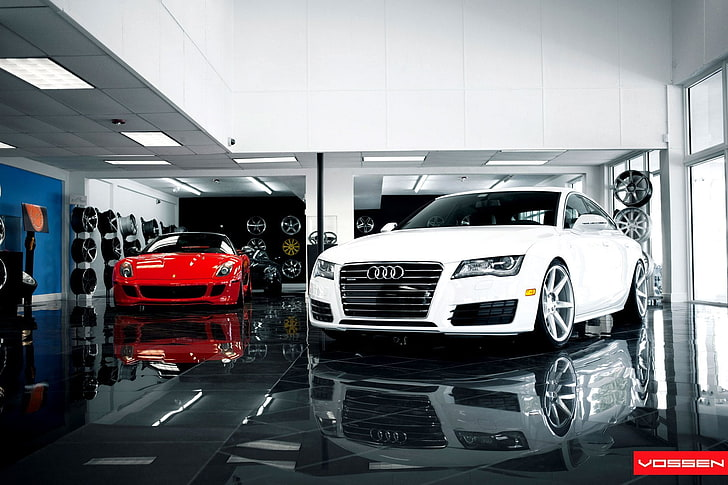

In [1]:
def FunctionInput(InputData):
    
    import pandas as pd
    import numpy as np
    
    pred = ['Age','Weight','KM', 'HP','MetColor','CC','Doors']
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.preprocessing import PowerTransformer
    from sklearn.impute import SimpleImputer
    from sklearn.compose import ColumnTransformer
    
    X = InputData[pred]
    
    trans1 = ColumnTransformer(transformers = [
    ('trans1', SimpleImputer(strategy = 'median'), ['Age']),
    ('trans2', SimpleImputer(strategy = 'median'), ['Weight']),
    ('trans3', SimpleImputer(strategy = 'median'), ['KM']),
    ('trans4', SimpleImputer(strategy = 'most_frequent'), ['HP']),
    ('trans5', SimpleImputer(strategy = 'most_frequent'), ['MetColor']),
    ('trans6', SimpleImputer(strategy = 'most_frequent'), ['CC']),   
    ('trans7', SimpleImputer(strategy = 'most_frequent'), ['Doors'])
    ], remainder = 'passthrough')
    
     
    X = trans1.fit_transform(X)
    
    P = pd.DataFrame(data = X, columns = ['Age','Weight','KM', 'HP','MetColor','CC','Doors'])
    
    trans = ColumnTransformer(transformers = [
    ('trans8', FunctionTransformer(func = np.square), ['Age']),
    ('trans9', FunctionTransformer(func = np.log1p), ['Weight']),
    ('trans10', PowerTransformer(method = "box-cox", standardize=True), ['KM'])
    ], remainder = 'passthrough')
    
    P = trans.fit_transform(P)
    
    from sklearn.preprocessing import MinMaxScaler
    predictor = MinMaxScaler()
    
    P = predictor.fit_transform(P)
    
    
    import pickle
    
    with open('LR.pkl', 'rb') as filereadstream:
        predictedmodel = pickle.load(filereadstream)
        filereadstream.close()
        
        
    prediction = predictedmodel.predict(P)
    PredictionResult = pd.DataFrame(prediction, columns = ['Prediction'])
    return(round(PredictionResult))

In [2]:
pred = ['Age','Weight','KM', 'HP','MetColor','CC','Doors']

In [5]:
import pandas as pd
import numpy as np

NewData = pd.DataFrame(
data = [[37, np.nan, 20000, 200, 1, 3000, 4],
       [50, 2255.0, 40000, np.nan, 0, np.nan, 4]],
columns = pred)

In [6]:
FunctionInput(InputData=NewData)

,Prediction
0,13912.0
1,4268.0
